In [43]:
import os
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
import psycopg2

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

NEON_URI = os.environ.get("DB_URI_NEON")
NEON_PASSWORD = os.environ.get("DB_PASSWORD_NEON")
if not NEON_URI or not NEON_PASSWORD:
    raise "DB_URI_NEON and DB_PASSWORD_NEON environment variables must be set"

NEON_CONNECTION_URI = f"postgresql+psycopg2://FlatsDB_owner:{NEON_PASSWORD}@{NEON_URI}/FlatsDB?sslmode=require" if NEON_URI and NEON_PASSWORD else None

In [45]:
engine = create_engine(NEON_CONNECTION_URI)
Session = sessionmaker(bind=engine)

In [65]:
def get_all_offers() -> pd.DataFrame:
    Q_GET_OFFERS = """
    SELECT *
    FROM offers;
    """
    DTYPES = {"url_id": int, "construction_status": str, "ownership": str, "balcony": int, "terrace": int, "lift": int, "garage": int, "market": str, "offer_type": str, "city": str, "voivodeship": str, "longitude": np.float64, "latitude": np.float64, "created_at": str, "modified_at": str}
    
    with Session() as session:
        res = session.execute(text(Q_GET_OFFERS))
        df = pd.DataFrame(res.fetchall())
        df = df.astype(DTYPES)
        df.index = df["id"]
        df.drop("id", axis=1, inplace=True)
        return df

In [67]:
df = get_all_offers()

In [69]:
df.head()

,url_id,price,area,rooms,floor,floor_num,construction_status,ownership,build_year,balcony,...,lift,garage,market,offer_type,city,voivodeship,longitude,latitude,created_at,modified_at
id,,,,,,,,,,,,,,,,,,,,,
4,142277,259000,41.97,2,floor_1,4,ready_to_use,full_ownership,-1,1,...,0,0,secondary,mieszkanie,Wałbrzych,dolnośląskie,16.276918,50.811157,2024-09-30T15:47:02+02:00,2024-10-30T16:01:25+01:00
5,120108,389000,63.36,3,floor_1,7,ready_to_use,limited_ownership,1986,0,...,1,0,secondary,mieszkanie,Bydgoszcz,kujawsko-pomorskie,18.129560,53.151440,2024-04-14T22:25:22+02:00,2024-10-30T09:19:33+01:00
6,142666,495000,48.2,3,floor_9,10,to_renovation,limited_ownership,1967,1,...,1,0,secondary,mieszkanie,Poznań,wielkopolskie,16.907310,52.371820,2024-09-30T11:11:21+02:00,2024-10-30T11:16:07+01:00
7,159406,552628,54.91,3,floor_5,8,-1,full_ownership,2026,1,...,1,0,primary,mieszkanie,Poznań,wielkopolskie,16.949863,52.375072,2024-10-16T21:45:37+02:00,2024-11-02T11:30:36+01:00
8,80447,400000,35.6,1,floor_3,5,ready_to_use,full_ownership,2000,0,...,0,0,secondary,mieszkanie,Poznań,wielkopolskie,16.911043,52.389239,2024-10-04T12:29:06+02:00,2024-10-31T09:53:33+01:00


## Need to convert the data types in the dataframe

In [72]:
print(df.shape)
print(df.dtypes.value_counts())

(157275, 21)
object     14
int32       5
float64     2
Name: count, dtype: int64


## Which features are continous and which are discrete?

#### We can separate columns into these groups:

- **Continous**:
  - Price
  - Area
  - Longitude
  - Latitude
  - Created_At
  - Modified_At
- **Discrete**:
  - Rooms
  - Floor
  - Floor_num
- **Categorical**:
  - Construction_Status
  - Ownership
  - Balcony
  - Terrace
  - Lift
  - Garage
  - Market
  - Offer_type
  - City
  - Voivodeship


In [75]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['uniques'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
url_id,int32,0,0.000000,157275,157275
price,object,0,0.000000,31963,157275
area,object,0,0.000000,10781,157275
rooms,object,0,0.000000,12,157275
floor,object,0,0.000000,15,157275
floor_num,object,0,0.000000,59,157275
construction_status,object,0,0.000000,4,157275
ownership,object,0,0.000000,5,157275
build_year,object,0,0.000000,308,157275
balcony,int32,0,0.000000,3,157275


In [77]:
df = df.replace("-1", np.nan)

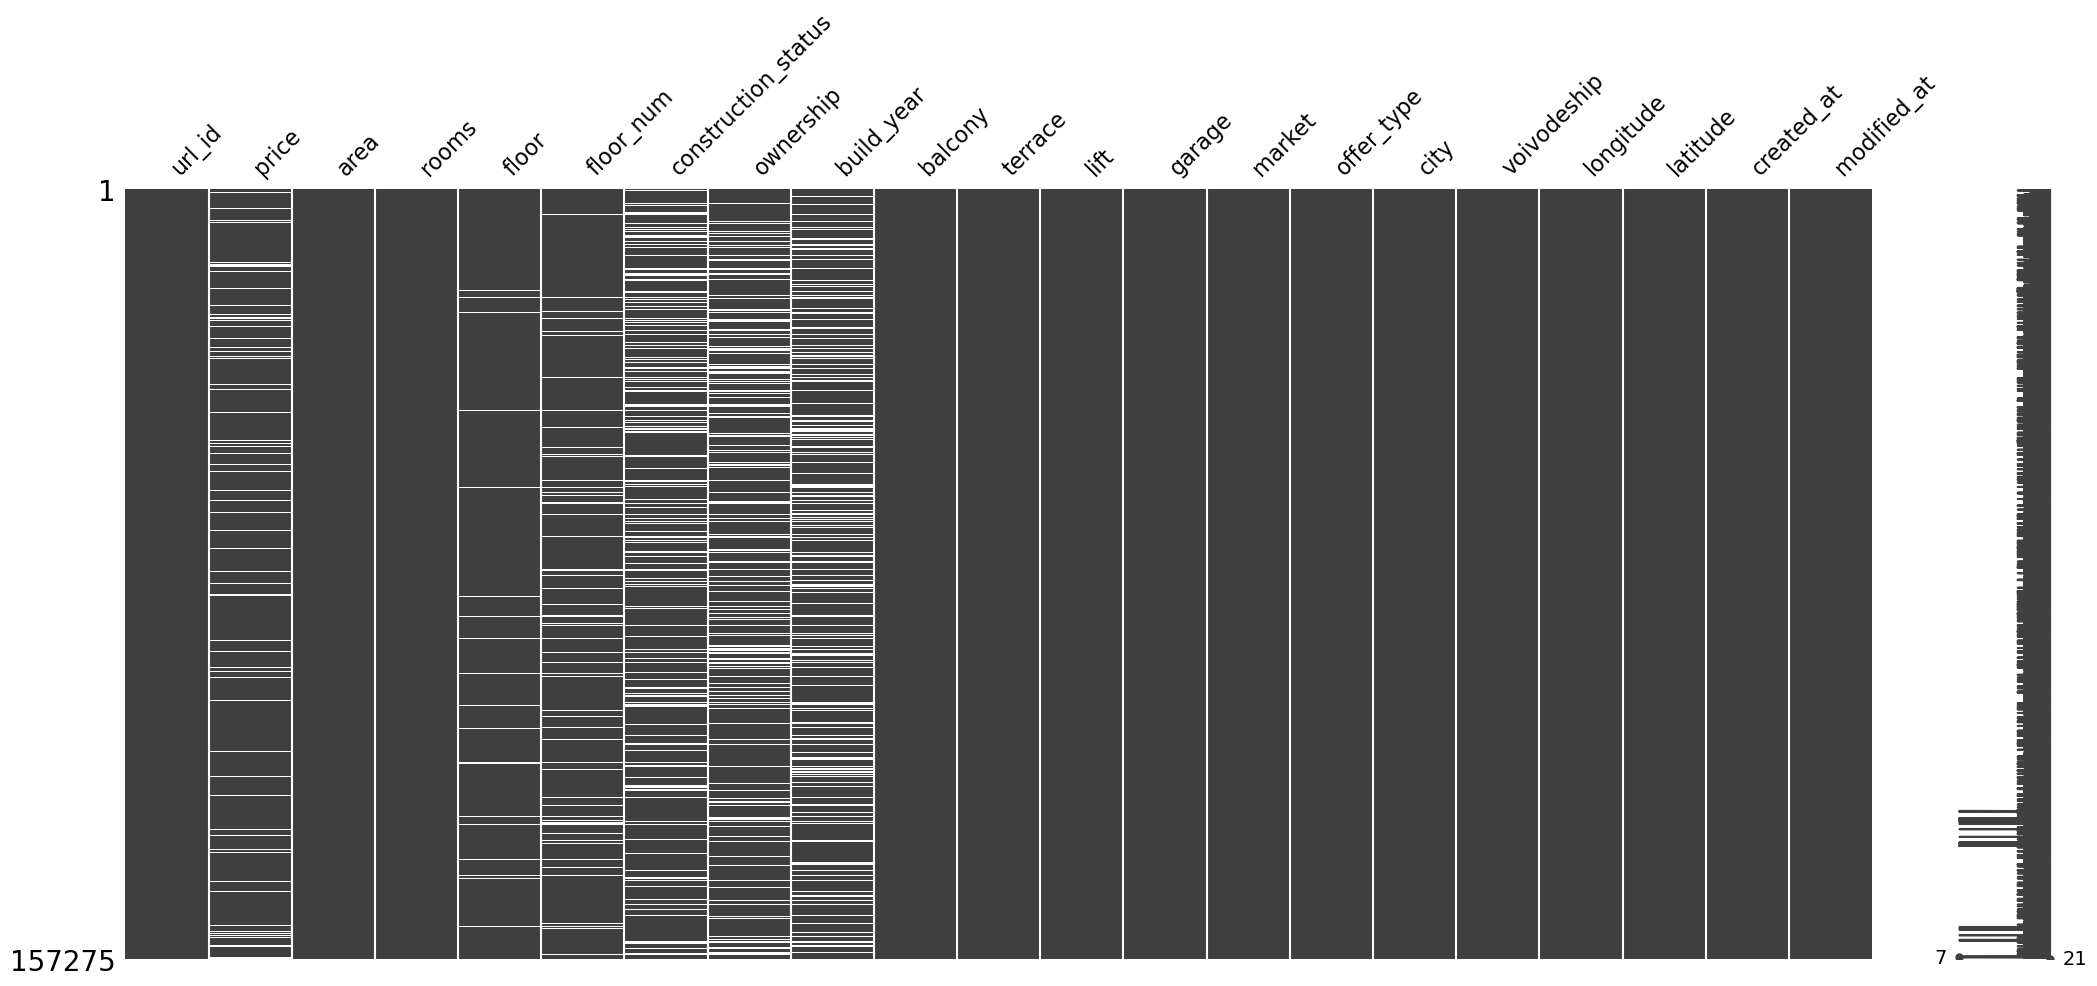

In [79]:
msno.matrix(df)
plt.show()

In [107]:
def entry_filter(df: pd.DataFrame) -> pd.DataFrame:
    trash_rows = (df["price"].isna()) | (df["floor"].isna()) | (df["floor_num"].isna() & df["construction_status"].isna() & df["ownership"].isna() & df["build_year"].isna())
    df = df[~trash_rows]
    return df

In [115]:
type(df["floor"]

pandas.core.series.Series

In [113]:
df["floor"].apply(lambda x: x.split("_")[1] if "ground" not in x else 0)

TypeError: argument of type 'float' is not iterable

# Casting the datatypes

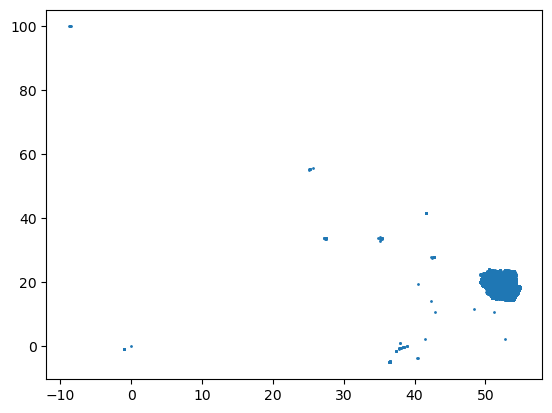

CPU times: total: 141 ms
Wall time: 141 ms


In [17]:
%%time

qq["longitude"] = qq["longitude"].astype(np.float16)
qq["latitude"] = qq["latitude"].astype(np.float16)
plt.scatter(qq["latitude"], qq["longitude"], s=1)
plt.show()